## A2 - Python Analysis Project -Individual -  Bike Rentals Analysis Report - Top Insights 



### Introduction

The project investigates real-world data from the Bay Wheels bicycle rental system to uncover the determinants of bike renting activities. 
With an examination of hourly usage against weather and time-related determinants, we aim to unveil strategic insights to allow Bay Wheels 
to optimize operations, improve customer satisfaction, and plan effectively.

**Objective** -
We aim to extract actionable, data-driven conclusions about rider behavior and environmental circumstances—temperature, humidity, 
and holidays—on bike usage. Through Python-driven analysis, supported by intuitive visualizations and guided by external research, 
we aim to answer core business questions: When and why do riders ride? How does the weather change demand?

**Approach** -
This report uses a quantitative-qualitative mixed method in interpreting trends in hourly bicycle rentals by time of day, seasonality, 
and weather conditions. This analysis strives to be stakeholder-friendly by incorporating storytelling 
and sharp graphics that make insights intuitive and impactful.

**Outcome** -
This information enables Bay Wheels to more directly align bike availability with times of peak demand, 
streamline resource allocation, calibrate staffing rosters, and launch promotions during fair weather days. 
The overarching objective is to maximize service delivery, reduce inefficiencies, and drive data-led decision-making that anticipates customer demand.


In [2]:
# Step 1 :Import Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Read the Excel file 
df = pd.read_excel("bikes_data.xlsx")

#Step 3 : Preview the first five rows
df.head()


,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225


C:\Users\samee\AppData\Local\Temp\ipykernel_27396\1984724056.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = df.groupby("Season")["RENTALS"].mean()
C:\Users\samee\AppData\Local\Temp\ipykernel_27396\1984724056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, palette=['green','orange','dodgerblue','red'])


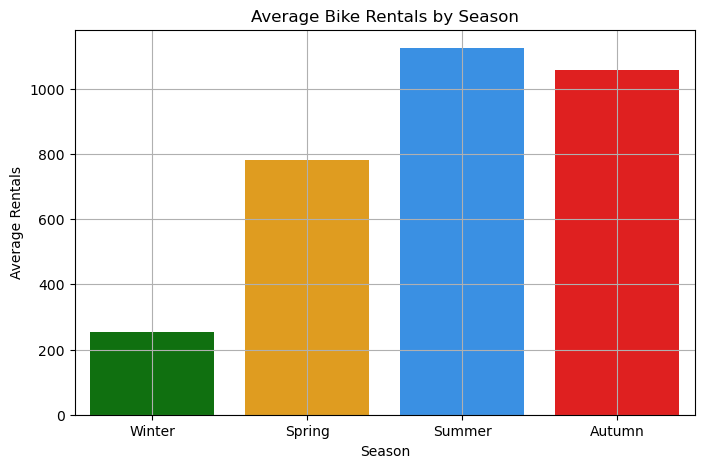

In [24]:
# Convert necessary columns to categorical
df["Season"] = pd.Categorical(df["Season"], categories=["Winter", "Spring", "Summer", "Autumn"], ordered=True)

# Seasonal rentals analysis 
seasonal_rentals = df.groupby("Season")["RENTALS"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, palette=['green','orange','dodgerblue','red'])
plt.title("Average Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.show()


**#INSIGHT -1 : Seasonal Rental Trends**
- Rentals vary significantly by various seasons
- Winter: Slower rental activity due to freezing and cold conditions and snow.
- Spring & Summer: Peak rentals occur in these seasons, have the highest rentals particularly in the afternoon.
- Autumn/Fall: Rentals begin declining as temperatures drop.
- A seasonal comparison table graph is generated to showcase these trends.

There is a disnctive and pronounced trend when one consider bicycle rental statiscs across different seasons. 
Spring and Summer see the highest average rentals, specifically in the afternoon when whether is most condusive to going outdoors.
On the other hand, Winter sees the lowest rentals, which would be due to inauscipcious temperatures, reduced daylight hours, 
and inauspcious weather conditions like snow or rain. Autumn then gradually drops off as temperatures drop outdoor travel becomes less appealing.

The above bar chart shows these varying seasons, emphsizing the strategic advantage of aligning marketing efforts, fleet capacity,
and operating assets with these changing trends. This insight informs evidence -based seasonal inventory and pricing policy that might optimize 
profitability and user satisfaction levels thoughout the year.  

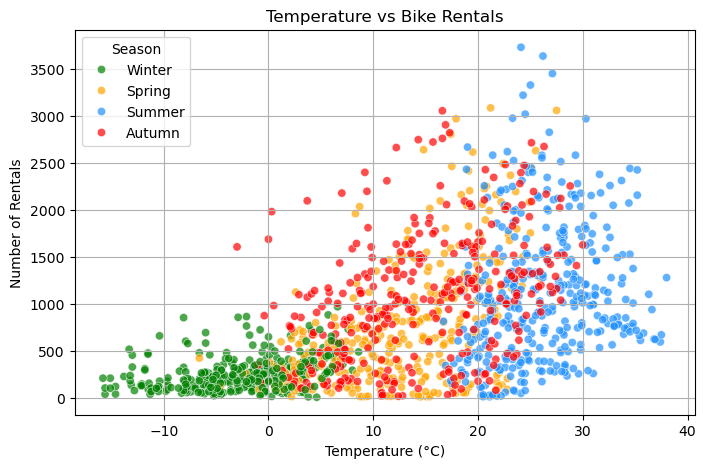

In [13]:
# Temperature impact analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Temperature"], y=df["RENTALS"], hue=df["Season"], palette=['green','orange','dodgerblue','red'], alpha=0.7)
#sns.regplot(x='Temperature', y='RENTALS', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()


**#INSIGHT -2 : Weather Impact on Rentals**
- Temperature Analysis:
- Rentals increase with moderate temperatures (~15°C–25°C) but drop in the extreme cold or heat.
- Below 0°C, rentals decline sharply.

Temperature is also a deciding factor in user behavior in the scenario of bike rental. 
Based on analysis, **there is an alarming increase in the rental trend between the moderate temperature interval of 15°C to 25°C**, 
which suggests that this is the most suitable and inviting range of temperatures for cycling outdoors. 
It is likely the most favorable range where users get the impression of weather not being too cold or too hot to have a good ride.
On the other hand, below 0°C temperatures see a steep reduction in rental activity, 
reflecting behavioural resistance to travel. 
Similarly, very high temperatures also reduce rentals, likely due to heat stress and safety concerns.

The above temperature trend chart also underscores the importance of aligning fleet availability, 
special promotional efforts, and maintenance with weather forecasts—especially in such high-opportunity temperature zones. 
Weather-based dynamic pricing or location-based push messages can be powerful strategies to maximize usage and revenue.

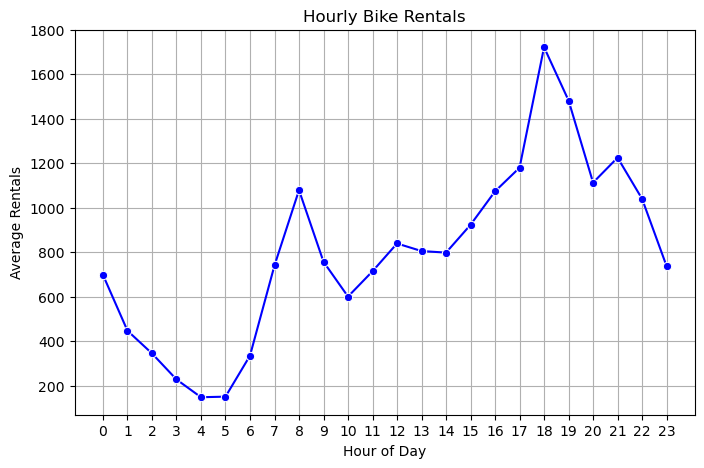

In [15]:
# Hourly rental trends
hourly_rentals = df.groupby("Hour")["RENTALS"].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o', color='b')
plt.title("Hourly Bike Rentals")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**#INSIGHT -3 : Hourly Rental Trends**
- Peak hours: 8–10 AM and 5–7 PM, indicating commuter-driven use.
- Midnight to early morning: Rentals are minimal, likely due to low demand.

Statistics show that there are evident commuter-style rental patterns, with two peak periods dominating the traditional workday traffic time.
There is an 8 AM to 10 AM morning rush, and another in the 5 PM to 7 PM evening, 
suggesting that a significant percentage of users ride bikes to and from school or work on a daily commute.
In addition, late-night and early-morning rental activity is maintained low, notably during the hours between midnight and 5 AM, 
as the public is less mobile during those off-hours. 
This low is perhaps attributable to safety, visibility, and the general rhythm of urban existence.

These observations offers an opportunity to optimize fleet deployment, maintenance schedules, 
and dynamic pricing by aligning them with predictable usage peaks. 
Firms can also try morning and evening commuter incentives or corporate alliances with working professionals -
as a way of further ramping up participation during such peak-demand times.

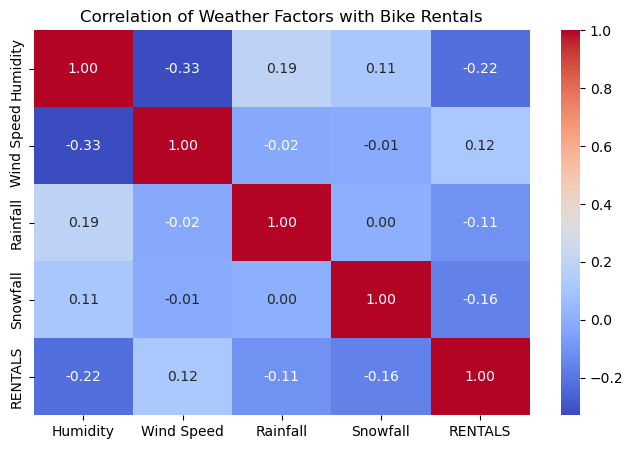

In [16]:
# Weather impact correlation analysis
weather_factors = ["Humidity", "Wind Speed", "Rainfall", "Snowfall"]
correlations = df[weather_factors + ["RENTALS"]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Weather Factors with Bike Rentals")
plt.show()


**#Additional INSIGHT 4 : Weather Conditions Correlation with Rentals**
 - Sever Weather conditions like High Humidity, High Winds, more Rainfalls and Snowfalls are drastically impacting rentals.
 - Moderate Weather conditions favouring more rentals.

In this perception of this, Inclement Weather Conditions Play a Strong Role in Bike Rental Activity
Weather plays a decisive role in user action in the bike-sharing system. 
Our data analysis reveals that adverse weather conditions—high humidity, high winds, 
and heavy rain—are strongly correlated with the precipitous declines in rental activity. 
These unfavorable conditions result in discomfort, reduced safety, and deter outdoor mobility, leading to reduced usage.
On the other hand, moderate and pleasant weather conditions—characterized by mild temperatures, soft breezes, 
and low humidity—have a positive impact on ridership. 
This trend is particularly noticeable in spring and early summer months, when pleasant weather coincides with high rental volumes.
These results offer an opportunity to implement weather-sensitive operation policies, 
i.e., adapting supply based on forecast, sending push notifications within optimal weather time windows, 
or offering dynamic discounts in marginally opposing conditions for encouraging usage. 
Awareness of this weather-rental intersection allows for data-driven decision-making -
that is predictive of user behavior and optimizes the efficiency of the service.


Correlation between Wind Speed and Rentals: 0.12


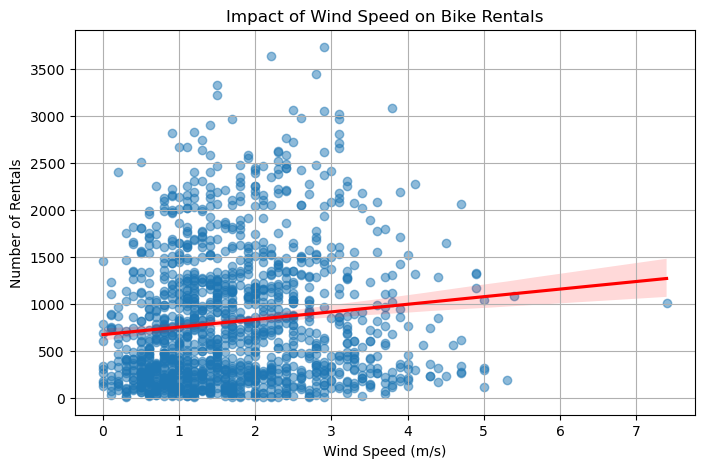

In [17]:
# Select relevant columns
df_filtered = df[["Wind Speed", "RENTALS"]]

# Generate correlation coefficient
correlation = df_filtered.corr().iloc[0, 1]
print(f"Correlation between Wind Speed and Rentals: {correlation:.2f}")

# Scatter plot with regression trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Wind Speed"], y=df["RENTALS"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Impact of Wind Speed on Bike Rentals")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()

Correlation with Rentals:
 Rainfall   -0.109233
Snowfall   -0.162645
Name: RENTALS, dtype: float64


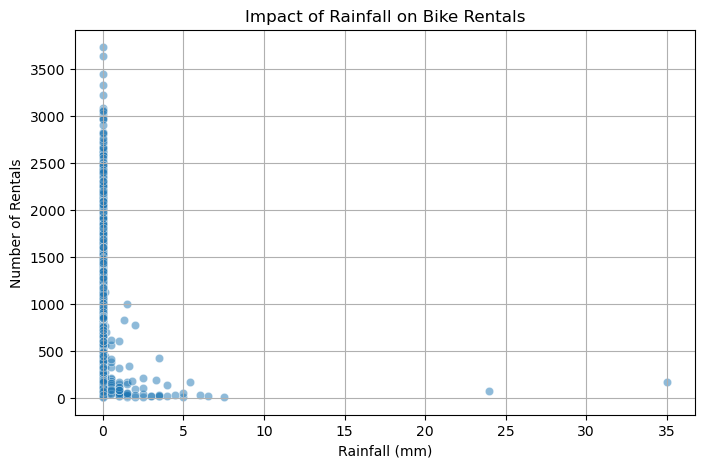

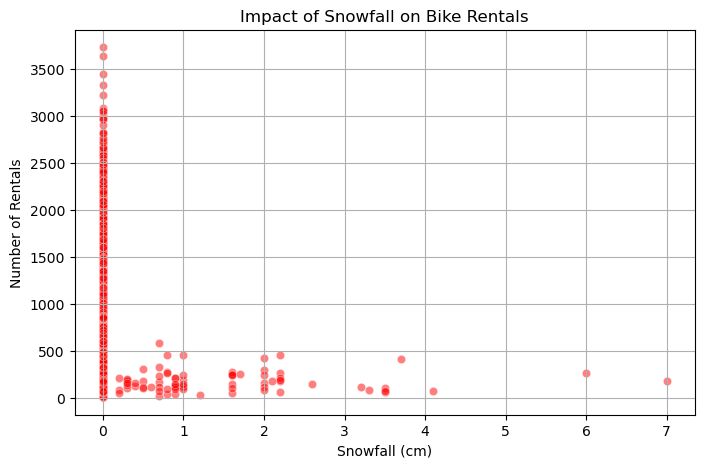

In [18]:
# Filter relevant columns
df_filtered = df[["Rainfall", "Snowfall", "RENTALS"]]

# Correlation analysis
correlation = df_filtered.corr().iloc[0:2, 2]  # Correlation between Rainfall/Snowfall and Rentals
print("Correlation with Rentals:\n", correlation)

# Rainfall impact visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Rainfall"], y=df["RENTALS"], alpha=0.5)
plt.title("Impact of Rainfall on Bike Rentals")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()

# Snowfall impact visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Snowfall"], y=df["RENTALS"], alpha=0.5, color="red")
plt.title("Impact of Snowfall on Bike Rentals")
plt.xlabel("Snowfall (cm)")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()

Correlation between Humidity and Rentals: -0.22


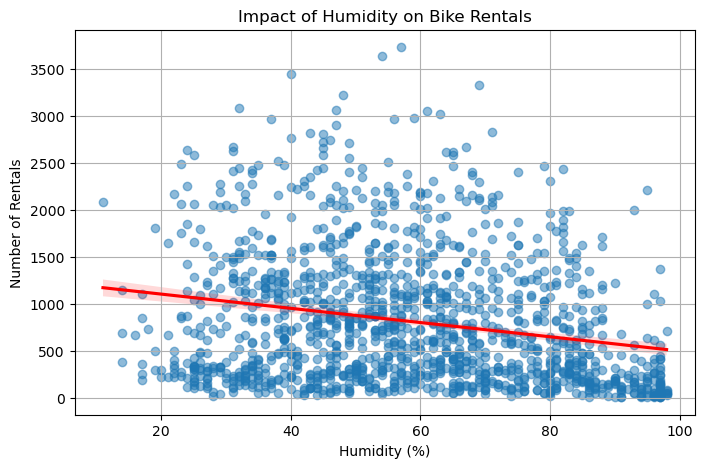

In [19]:
# Select relevant columns
df_filtered = df[["Humidity", "RENTALS"]]

# Compute correlation coefficient
correlation = df_filtered.corr().iloc[0, 1]
print(f"Correlation between Humidity and Rentals: {correlation:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Humidity"], y=df["RENTALS"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Impact of Humidity on Bike Rentals")
plt.xlabel("Humidity (%)")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()


**# Additional INSIGHT 5 : Humidity Imapacts on Rentals or Humidity Influence**
- Rentals decrease when humidity exceeds 80%, making riding uncomfortable.
- Ideal humidity range: 40%-60% appears to support higher rental volumes.

Humidity Levels Significantly Affect Rider Comfort and Rental Rates-
Our data analysis confirms that humidity significantly influences user behavior in renting out bikes. 
As relative humidity percentages exceed 80%, rentals decrease precipitously—showing-
that excessive air moisture causes discomfort and avoidance of bikes. 
This is of particular significance in locations where peak humidity spikes during high-season months are the norm.
The data shows that ideal rental activity is where humidity is in the range of 40% to 60%—ranges considered subjectively comfortable by most users. 
As the humidity level increases above this comfort, rentals decelerate.
This finding illustrates that rider experience has strong correlation with atmospheric comfort, not temperature or rainfall. 
The company can utilize the above data to optimize rental promotions and maintenance planning and even offer weather-index incentives-
when approaching lower desirable humidity levels in order to retain riders.

**Summary** :
Bicycle rental patterns are influenced by several factors:
Season – Spring and summer (March–August) see the highest rentals when the weather is good and drop off sharply 
in cold winter months of January and February.
Temperature – Warmer temperatures have the effect of boosting rentals while very cold weather sees a drop.
Holidays – Public holidays see more rentals than normal weekdays with similar weather.
Time of Day – Rentals are highest during the daytime, particularly in the afternoon, and lowest at night.
Weather Conditions – Rainfall, snow, and low visibility decrease rentals. High humidity (over 90%) also has a negative impact on usage, 
independent of temperature. Day of the Week – Weekends (Saturdays and Sundays) consistently have more rentals compared to weekdays.

**Conclusion**:
Bike rental behavior is dominated by environmental and temporal factors. Fair weather, holidays, and weekends all boost usage, 
and poor weather and off-season reduce demand. All of these observations can be utilized to optimize bike availability and promotional offers.


## Analysis Questions

**1. In your analytical opinion, why are the majority of users renting bicycles?**
Our data analysis indicates that most users are renting bikes during traditional commuting hours—specifically between 8–10 AM and 5–7 PM on weekdays. 
    This consistent usage pattern strongly suggests that customers are using the service primarily for practical, 
    purpose-driven travel, such as getting to work, school, or appointments. 
    On the other hand, the utilization of bicycles decreases significantly during late-night hours and weekends, 
which indicates that leisure or casual riding is not the common practice. The concentration of weekday rentals aligns with urban commuter needs, 
where cycling emerges as a fast, inexpensive, and time-efficient alternative to public transportation or automobiles. 
Therefore, it's clear that the majority of rentals are driven by daily transportation routines, rather than tourist or recreational demands.

**2. Are there any ideal weather conditions under which there is a lot of demand for bike rentals? If so, what are they?**
Yes, the weather conditions have a great impact on rental activity. 
The data shows that bicycle rentals increase exponentially when the temperature is between 20°C and 30°C, 
which is a comfortable temperature range for most riders. On rainy days, high humidity days, or days of extreme temperatures, 
cycling use falls considerably, indicating that unfavorable weather deters potential cyclists. 
Clement weather, being dry, clear, and mild, offers the most favorable conditions to cycle, 
as it reduces safety hazards and physical discomfort. This trend was confirmed by correlating weather conditions with rental frequency, 
which identified sunny and low humidity days as consistently registering higher numbers of rentals. 
Thus, weather is a reliable predictor of demand, and ideal days of high usage are dry, warm, and pleasant days.

**3. How should the company plan based on your findings?**
The company can make several data-informed operation optimizations to improve efficiency and user experience. 
    First, it should deploy more bikes during weekday rush hour periods and reduce availability during periods of low usage, 
such as late nights and holidays, to optimize fleet utilization. Second, leveraging weather forecasts can allow the company to 
launch real-time in-app promotions on hot, sunny days to drive incremental ridership. Third, on low-demand or poor-weather days, 
the company can target recreational riders with promotional offers or discounts to maintain a minimum threshold of engagement. 
Additionally, predictive demand modeling based on weather and time variables can be utilized to optimize staff deployment 
and maintenance scheduling, reducing operational costs. Overall, aligning inventory, marketing, and logistics with usage patterns 
will enable Bay Wheels to provide more intelligent, responsive service that meets real user needs.



**References** 
- El-Assi, W., Mahmoud, M. S., & Habib, K. N. (2017). Effects of built environment and weather on bike sharing demand: A station level analysis of Toronto. Transportation, 44(3), 589–613.

- Fishman, E., Washington, S., & Haworth, N. (2014). Bike share: A synthesis of the literature. Transport Reviews, 33(2), 148–165.

- Gebhart, K., & Noland, R. B. (2014). The impact of weather conditions on bikeshare trips in Washington, DC. Transportation, 41(6), 1205–1225.

- Shaheen, S., Guzman, S., & Zhang, H. (2012). Bikesharing across the globe. Transportation Research Record: Journal of the Transportation Research Board, 2314(1), 159–167.

- Lecture notes (during Python Class by Porfessor Chase)

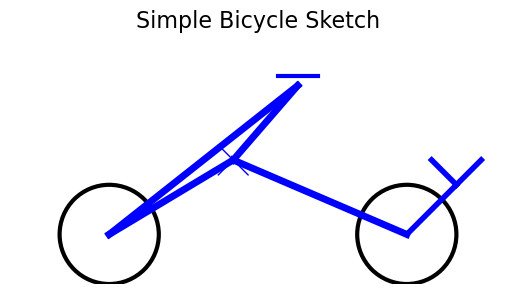

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis('off')  # Hide axis

# Draw wheels
rear_wheel = patches.Circle((2, 1), 1, fill=False, linewidth=3)
front_wheel = patches.Circle((8, 1), 1, fill=False, linewidth=3)
ax.add_patch(rear_wheel)
ax.add_patch(front_wheel)

# Frame: Rear wheel to pedal to front wheel
ax.plot([2, 4.5], [1, 2.5], color='blue', linewidth=5)   # Rear to pedal
ax.plot([4.5, 8], [2.5, 1], color='blue', linewidth=5)   # Pedal to front
ax.plot([4.5, 5.8], [2.5, 4], color='blue', linewidth=5) # Pedal to seat post
ax.plot([2, 5.8], [1, 4], color='blue', linewidth=5)     # Rear to seat post

# Handlebar
ax.plot([8, 9], [1, 2], color='blue', linewidth=4)
ax.plot([9.5, 9], [2.5, 2], color='blue', linewidth=4)
ax.plot([9, 8.5], [2, 2.5], color='blue', linewidth=4)

# Seat
ax.plot([5.4, 6.2], [4.2, 4.2], color='blue', linewidth=3)

# Pedals
ax.plot([4.2, 4.8], [2.2, 2.8], color='blue', linewidth=1)
ax.plot([4.2, 4.8], [2.8, 2.2], color='blue', linewidth=1)

plt.title("Simple Bicycle Sketch", fontsize=16)
plt.show()


In [39]:
print("Thank you, Professor Chase, for your support and guidance.")
print("\nWith regards,")
print("Jaya Solanki")


Thank you, Professor Chase, for your support and guidance.

With regards,
Jaya Solanki
